# Get Python to do the Math for You

Math can help you understand a lot of methods in data science. Solving equations by hand can be time consuming and error prone, especially if it's not your day job. Luckily, Python can handle the boring parts for you so you can focus on understanding how it works, and getting things done.

## Contents

[Setup](#Setup)<br>
[Plotting a function](#Plotting-a-function)<br>
[Partial Functions (Fixing Variables)](#Partial-Functions-(Fixing-Variables))<br>
[Re-arange a simple equation](#Re-arange-a-simple-equation)<br>

## Setup

In [10]:
import sympy as sym
from sympy import symbols, plot, lambdify, sympify, diff, Sum, IndexedBase, Eq, solve
import numpy as np

# plotting
import seaborn as sns

In [2]:
# set plot style for dark mode (not necessary to understand the notebook)
sns.set_theme(rc={
                  'font.size': 10,
                  'xtick.labelsize': 8,
                  'ytick.labelsize': 8,
                  'axes.labelsize': 8,
                  'axes.spines.right': False,
                  'axes.spines.top': False,
                  'axes.facecolor': '#1E1E1E',  # Very dark gray
                  'figure.facecolor': '#1E1E1E',  # Very dark gray
                  'axes.grid': False,
                  'xtick.color': 'w',  # White x-axis tick labels
                  'ytick.color': 'w',  # White y-axis tick labels
                  'text.color': 'w',  # White text
                  'axes.labelcolor': 'w',  # White axis labels
                  'figure.titlesize': 'large',  # Set the size of the figure title
                  'figure.titleweight': 'bold',  # Set the weight of the figure title
              })

# store a colour palette
col_pal = sns.color_palette("muted")
sns.set_palette(col_pal)

In [1]:
# supress unhelpful warnings
import warnings

# this is an issue within the seaborn library and will likely be fixed in the future
warnings.filterwarnings("ignore", category=FutureWarning)

## Plotting a function

If you can plot a function, for many of us (me included) it's the best way to wrap your head around it.

Let's plot the function $3x^2 + 2x + 1$ over the interval $[-5, 5]$

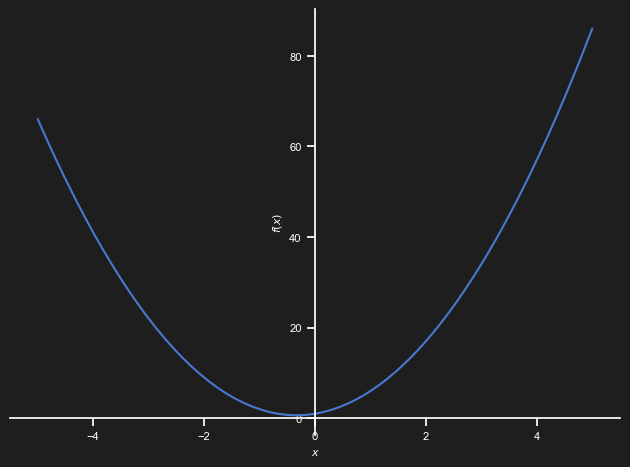

In [4]:
x = symbols('x')
f = 3*x**2 + 2*x + 1

# Plot the function f over the range x = [-5, 5].
plot(f, (x, -5, 5));

In [5]:
# we still have access to the equation f, until we overwrite it
f

3*x**2 + 2*x + 1

## Partial Functions (Fixing Variables)

This is something you might be able to work out with standard python. For example:

In [6]:
def quad(a, b, c, x):
    """
    Returns the value of the quadratic equation ax^2 + bx + c for a given value of x.

    Parameters:
    a (float): The coefficient of x^2.
    b (float): The coefficient of x.
    c (float): The constant term.
    x (float): The value of x.

    Returns:
    float: The value of the quadratic equation ax^2 + bx + c for the given value of x.
    """
    return a*x**2 + b*x + c
    
quad(3, 2, 1, 2)

17

You simplify only modify the value of x, or fix the values of a, b, and and c within the function. However, there are some handy tools to add to the mix...

We can create a similar function to the one above using lambdify.

In [7]:
a, b, c, x = symbols('a b c x')
expr = a*x**2 + b*x + c

f_lamb = lambdify((x,), expr.subs({a: 3, b: 2, c: 1}))
f_lamb(2)

17

If we want a sympy equation as an output though, we can do the follwing:

In [8]:
a, b, c, x = symbols('a b c x')
expr = a*x**2 + b*x + c

f_eq = expr.subs({a: 3, b: 2, c: 1})

f_eq.subs({x: 2})

17

This is an example of a partial function. We fix a, b, and c, and then it's easier to explore what happens when we vary x. It works the same way as partial from  functools. I give an example of that below.

In [9]:
from functools import partial

partial_quad = partial(quad, 3, 2, 1)
partial_quad(2)

17

If we plot this partial function we get exactly the same result as above. Remember this is using this definition: <br> 
```f_eq = expr.subs({a: 3, b: 2, c: 1})``` <br>
The plot function requires a sympy expression, so we can't use the partial function from functools or the lambdify function directly.

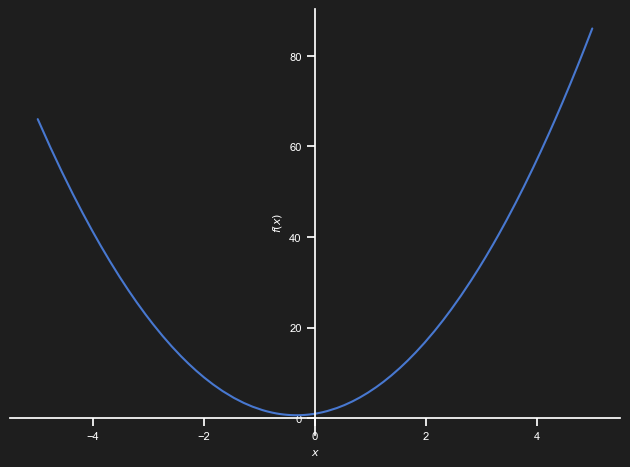

In [10]:
plot(f, (x, -5, 5));

If you want to use the partial function from functools, or the lambdify function, there is an example below.

This also allows you to easily add noise etc. to the function.

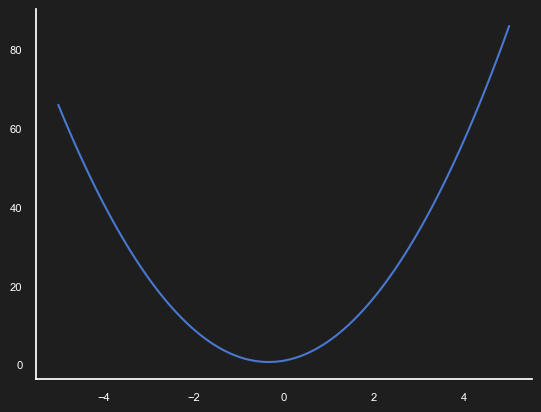

In [15]:
x = np.linspace(-5, 5, 100)
f_lamb(x)
sns.lineplot(x=x, y=f_lamb(x));

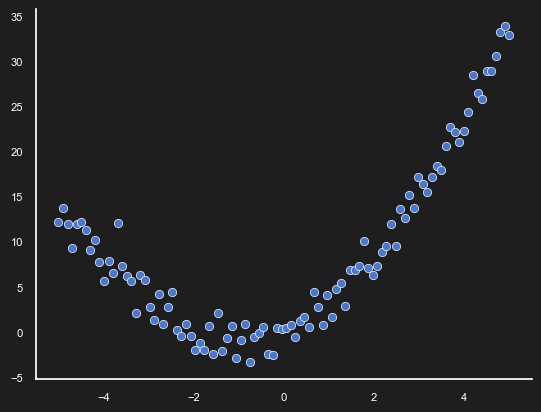

In [19]:
np.random.seed(42)

def add_noise(x, mult, add):
    """
    Adds random noise to a given value.

    Parameters:
    x (float): The value to add noise to.
    mult (float): The standard deviation of the multiplicative noise.
    add (float): The standard deviation of the additive noise.

    Returns:
    float: The noisy value.
    """
    noise_mult = 1 + normal(scale=mult, size=x.shape)
    noise_add = normal(scale=add, size=x.shape)
    return x * noise_mult + noise_add 

y = add_noise(f(x), 0.3, 1.5)

sns.scatterplot(x=x, y=y);

---

## Re-arange a simple equation

To find the number of sides \( N \) in a regular polygon given one of its interior angles $ \text{Degrees} $, we can use the formula for the interior angle of a regular polygon:


$\text{Interior angle} = \frac{(N - 2) \times 180^\circ}{N}$

What if we had the interior angle and we want to find N? We can use sympy to re-arange this equation for us.

In [8]:
# n = n sides
# i = interior angle
n, i = symbols('n i')
eq = Eq(i, ((n-2) * 180) / n)
eq

Eq(i, (180*n - 360)/n)

In [29]:
eq_i = solve(eq, n)[0]
display(eq_i)

f = lambdify((i,), eq_i)
f(3)

-360/(i - 180)

2.0338983050847457

In [25]:
display(eq.subs({i: 3}))
display(eq_i.subs({i: 3}).evalf())
display(eq_i.subs({i: 3}))

Eq(3, (180*n - 360)/n)

2.03389830508475

120/59

---

## Calculate the derivative of a function

In [2]:
# Define symbols and expression
a, b, c, x = symbols('a b c x')
expr = a*x**2 + b*x + c

# Compute the derivative
derivative_expr = diff(expr, x)

# Substitute values a=3, b=2, c=1 into the derivative
derivative_substituted = derivative_expr.subs({a: 3, b: 2, c: 1})

# Optionally, evaluate the derivative at a specific x-value, e.g., x=1
derivative_at_point = derivative_substituted.subs(x, 1)

print("Derivative expression:", derivative_expr)
print("Derivative after substitution:", derivative_substituted)
print("Derivative evaluated at x=1:", derivative_at_point)


Derivative expression: 2*a*x + b
Derivative after substitution: 6*x + 2
Derivative evaluated at x=1: 8


In [11]:
# Define symbols
a, b = symbols('a b')
N = symbols('N', integer=True)
i = symbols('i', integer=True)
x = IndexedBase('x')
y = IndexedBase('y')

# Define the function and the loss function
f_x = a * x[i] + b
mse = (1 / N) * Sum((y[i] - f_x)**2, (i, 1, N))

# Compute the derivatives of the loss function
derivative_mse_a = diff(mse, a)
derivative_mse_b = diff(mse, b)
derivative_mse_x = diff(mse, x[i])

print("Derivative of MSE with respect to a:", derivative_mse_a)
print("Derivative of MSE with respect to b:", derivative_mse_b)
print("Derivative of MSE with respect to x[i]:", derivative_mse_x)


Derivative of MSE with respect to a: Sum(-2*(-a*x[i] - b + y[i])*x[i], (i, 1, N))/N
Derivative of MSE with respect to b: Sum(2*a*x[i] + 2*b - 2*y[i], (i, 1, N))/N
Derivative of MSE with respect to x[i]: Sum(-2*a*(-a*x[i] - b + y[i]), (i, 1, N))/N


In [5]:
mse

Sum((-a*x[i] - b + y[i])**2, (i, 1, N))/N

In [12]:
derivative_mse_x

Sum(-2*a*(-a*x[i] - b + y[i]), (i, 1, N))/N